# Conducción de Calor en 2D

**Objetivo General**
- Resolver numérica y computacionalmente la ecuación de conducción de calor en dos dimensiones.

**Objetivos particulares**
- Definir los parámetros físicos y numéricos.
- Definir la malla del dominio.
- Definir la temperatura inicial junto con sus condiciones de frontera y graficarla sobre la malla.
- Definir el sistema lineal y resolverlo.
- Graficar la solución.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import hecompa_FD2D as fd2
import macti.visual as mvis

# TODO: hacer este cambio en macti.visual
plt.rcParams['axes.grid'] = False

## Parámetros físicos y numéricos

In [2]:
# Tamaño del dominio
Lx = 1.0
Ly = 1.0

# Número de nodos en cada eje
Nx = 4
Ny = 4

# Número total de nodos en cada eje incluyendo las fronteras
NxT = Nx + 2
NyT = Ny + 2

# Número total de nodos
NT = NxT * NyT

# Número total de incógnitas
N = Nx * Ny

# Tamaño de la malla en cada dirección
hx = Lx / (Nx+1)
hy = Ly / (Ny+1)

# Coordenadas de la malla
xn = np.linspace(0,Lx,NxT)
yn = np.linspace(0,Ly,NyT)

# Generación de una rejilla
xg, yg = np.meshgrid(xn, yn, indexing='ij')

In [3]:
print('Total de nodos en x = {}, en y = {}'.format(NxT, NyT))
print('Total de incógnitas = {}'.format(N))
print('Coordenadas en x : {}'.format(xn))
print('Coordenadas en y : {}'.format(yn))
print('hx = {}, hy = {}'.format(hx, hy))

Total de nodos en x = 6, en y = 6
Total de incógnitas = 16
Coordenadas en x : [0.  0.2 0.4 0.6 0.8 1. ]
Coordenadas en y : [0.  0.2 0.4 0.6 0.8 1. ]
hx = 0.2, hy = 0.2


### Graficación de la malla del dominio

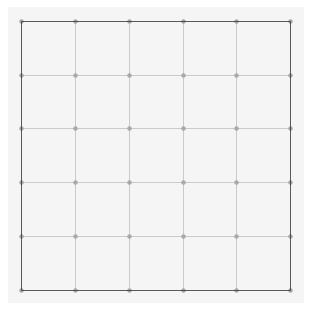

In [4]:
fig = plt.figure()
ax = plt.gca()

# Ejecutamos la función plot_mesh(...)
fd2.plot_mesh(ax, xg, yg)

# Dibujamos el recuadro con la función plot_fame(...)
fd2.plot_frame(ax, xn, yn)

## Campo de temperaturas y sus condiciones de frontera

In [5]:
# Definición de un campo escalar en cada punto de la malla
T = np.zeros((NxT, NyT))

# Condiciones de frontera
TB = 1.0
TT = -1.0

T[0 , :] = 0.0 # LEFT
T[-1, :] = 0.0 # RIGHT
T[: , 0] = TB  # BOTTOM
T[: ,-1] = TT  # TOP

print('Campo escalar T ({}):\n {}'.format(T.shape, T))

Campo escalar T ((6, 6)):
 [[ 1.  0.  0.  0.  0. -1.]
 [ 1.  0.  0.  0.  0. -1.]
 [ 1.  0.  0.  0.  0. -1.]
 [ 1.  0.  0.  0.  0. -1.]
 [ 1.  0.  0.  0.  0. -1.]
 [ 1.  0.  0.  0.  0. -1.]]


### Graficación del campo escalar sobre la malla

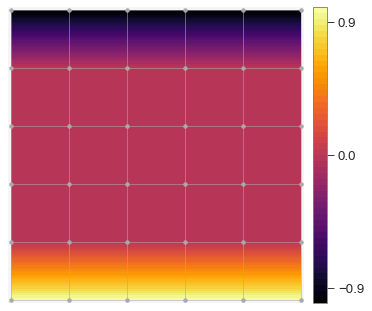

In [6]:
fig = plt.figure()
ax = plt.gca()
cax = fd2.set_canvas(ax, Lx, Ly)

c = ax.contourf(xg, yg, T, levels=50, cmap='inferno')
fd2.plot_mesh(ax, xg, yg)

fig.colorbar(c, cax=cax, ticks=[-0.9, 0.0, 0.9])
plt.show()

## Sistema lineal

In [7]:
# La matriz del sistema. Usamos la función predefinida buildMatrix2D()
A = fd2.buildMatrix2D(Nx,Ny,-4)
A

array([[-4.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 1., -4.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  1., -4.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  1., -4.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 1.,  0.,  0.,  0., -4.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  1., -4.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  1., -4.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  1., -4.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0., -4.,  1.,  0.,  0.,  1.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1., -4.,  1.,  0.,  0.,
         1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0

In [8]:
# RHS
b = np.zeros((Nx,Ny))
b[:, 0] -= TB  # BOTTOM
b[:,-1] -= TT  # TOP
b

array([[-1.,  0.,  0.,  1.],
       [-1.,  0.,  0.,  1.],
       [-1.,  0.,  0.,  1.],
       [-1.,  0.,  0.,  1.]])

## Solución del sistema

Revisamos el formato del vector b

In [9]:
b.shape

(4, 4)

El vector debe ser de una sola dimensión:

In [10]:
b.flatten()

array([-1.,  0.,  0.,  1., -1.,  0.,  0.,  1., -1.,  0.,  0.,  1., -1.,
        0.,  0.,  1.])

In [11]:
# Calculamos la solución.
T_temp = np.linalg.solve(A, b.flatten())
T_temp

array([ 0.40909091,  0.11363636, -0.11363636, -0.40909091,  0.52272727,
        0.15909091, -0.15909091, -0.52272727,  0.52272727,  0.15909091,
       -0.15909091, -0.52272727,  0.40909091,  0.11363636, -0.11363636,
       -0.40909091])

In [12]:
T_temp.shape

(16,)

Colocamos la solución en el campo escalar T de manera adecuada

In [13]:
T[1:-1,1:-1] = T_temp.reshape(Nx,Ny)
T

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -1.        ],
       [ 1.        ,  0.40909091,  0.11363636, -0.11363636, -0.40909091,
        -1.        ],
       [ 1.        ,  0.52272727,  0.15909091, -0.15909091, -0.52272727,
        -1.        ],
       [ 1.        ,  0.52272727,  0.15909091, -0.15909091, -0.52272727,
        -1.        ],
       [ 1.        ,  0.40909091,  0.11363636, -0.11363636, -0.40909091,
        -1.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -1.        ]])

### Gráfica de la solución

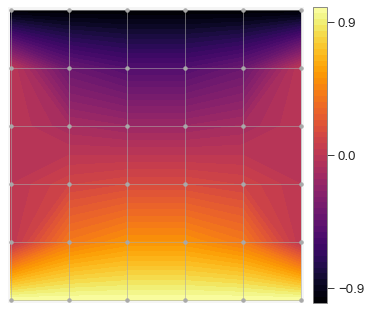

In [14]:
fig = plt.figure()
ax = plt.gca()
cax = fd2.set_canvas(ax, Lx, Ly)

c = ax.contourf(xg, yg, T, levels=50, cmap='inferno')
fd2.plot_mesh(ax, xg, yg)

fig.colorbar(c, cax=cax, ticks=[-0.9, 0.0, 0.9])
plt.show()